In [1]:
import os
import json

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False
warnings.filterwarnings("ignore")

plt.style.use('seaborn-whitegrid')
pd.set_option('display.max_columns', None)

In [2]:
def load_json(pth):
    return json.load(open(pth, "r"))

In [3]:
data = load_json("./dataset.json")
train = pd.DataFrame(data)
train.head()

,public_metrics,id,lang,created_at,text,author_id,in_reply_to_user_id,referenced_tweets,withheld,label
0,"{'retweet_count': 2, 'reply_count': 0, 'like_c...",1281829444043382784,en,2020-07-11T05:55:29.000Z,"Waltenburg MA, Victoroff T, Rose CE, et al. Up...",2889108801,None,None,None,real
1,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1298537500152139776,en,2020-08-26T08:27:20.000Z,What to Do When You Clash with Your Kid’s Gran...,824963011546804225,None,None,None,real
2,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1280262797088169984,en,2020-07-06T22:10:11.000Z,JUST IN: \n\nAtlanta Mayor Keisha Lance Bottom...,1275133819939586050,None,None,None,real
3,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1284985315170480129,en,2020-07-19T22:55:47.000Z,Could Bats Hold Clues to COVID Treatments? Don...,56897900,None,None,None,real
4,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",1279402748438593538,en,2020-07-04T13:12:40.000Z,“MMR vaccine could prevent worst symptoms of C...,314706658,None,None,None,real


In [4]:
train["label"].value_counts(normalize=True)

real    0.948068
fake    0.051932
Name: label, dtype: float64

In [5]:
train["label"].value_counts()

real    242587
fake     13288
Name: label, dtype: int64

In [6]:
train.shape

(255875, 10)

In [7]:
train.drop_duplicates(subset=["id"], inplace=True)
train = train[train.lang == "en"]
train.shape

(221439, 10)

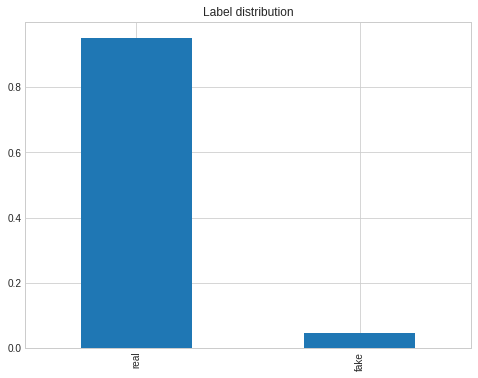

In [8]:
train["label"].value_counts(normalize=True).plot.bar()
plt.title("Label distribution")
plt.show()

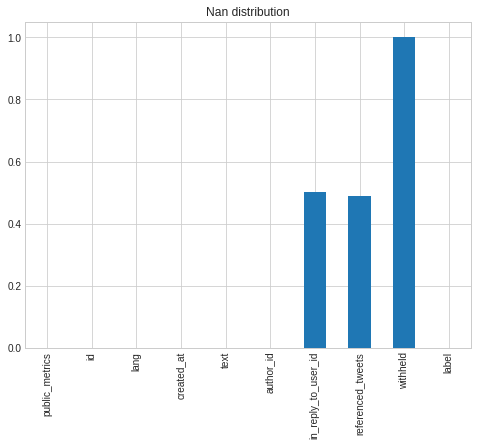

In [9]:
train.isna().mean().plot.bar()
plt.title("Nan distribution")
plt.show()